<a href="https://colab.research.google.com/github/domdelvecchio/machine-learning-101/blob/main/binary%20classification/ionosphere/ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [91]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [92]:
tf.__version__

'2.4.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [93]:
url = 'https://raw.githubusercontent.com/domdelvecchio/machine-learning-101/main/binary%20classification/ionosphere/ionosphere.data.csv'
dataset = pd.read_csv(url)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [94]:
print(X)
print(y)

[[ 1.    0.    1.   ... -0.06 -0.14 -0.02]
 [ 1.    0.    1.   ... -0.24  0.56 -0.38]
 [ 1.    0.    1.   ...  1.   -0.32  1.  ]
 ...
 [ 1.    0.    0.95 ...  0.    0.93 -0.01]
 [ 1.    0.    0.91 ... -0.04  0.87 -0.16]
 [ 1.    0.    0.85 ... -0.07  0.86 -0.06]]
['b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' '

Label output data 'g' and 'b'

In [95]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Splitting the dataset into the Training set and Test set

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [97]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [98]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [99]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [100]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [101]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

### Training the ANN model on the Training set

In [102]:
history = ann.fit(X_train, y_train, batch_size = 512, epochs = 1000, verbose = 0)

## Plot Accuracy

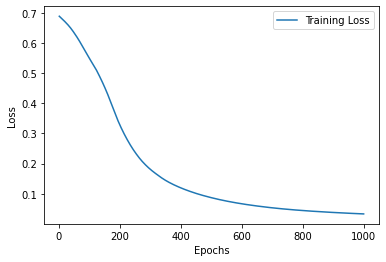

In [103]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate test data

In [104]:
# evaluate the model
loss, acc = ann.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.943


### Predicting the results of the Test set

In [105]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.around(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)).astype(int))

[[1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


# Make a prediction

In [106]:
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = ann.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 1.000
